# Exploratory Data Analysis

## Importing and formatting the Data

In [128]:
# Importing the secessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the csv file into pandas dataframe
df = pd.read_csv("./AQI_data.csv")
df_size = len(df)
df

,timestamp,PM10 ug/m3,PM2.5 ug/m3,PM 1 ug/m3,O3 ppb,CO ppm,NO ppb,NO2 ppb,NOx ppb,CO2 ppm
0,6/5/2019 1:00,44.35,29.95,14.73,NaN,NaN,NaN,NaN,NaN,NaN
1,6/5/2019 2:00,42.13,28.35,13.93,NaN,NaN,NaN,NaN,NaN,NaN
2,6/5/2019 3:00,47.98,32.55,15.93,NaN,NaN,NaN,NaN,NaN,NaN
3,6/5/2019 4:00,58.43,39.73,19.33,NaN,NaN,NaN,NaN,NaN,NaN
4,6/5/2019 5:00,49.70,33.58,16.40,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
26886,29/06/2022 07:00,12.68,6.80,4.38,6.33,10.57,16.90,1.04,3.0,415.14
26887,29/06/2022 08:00,13.43,7.30,4.70,6.04,10.03,16.07,1.04,6.0,413.11
26888,29/06/2022 09:00,21.65,12.85,8.33,6.78,11.40,18.19,0.95,9.0,419.65
26889,29/06/2022 10:00,15.58,8.75,5.65,6.78,11.40,18.18,0.86,12.0,426.25


In [129]:
# Converting timestamp column to a datetime data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['timestamp']


0       2019-06-05 01:00:00
1       2019-06-05 02:00:00
2       2019-06-05 03:00:00
3       2019-06-05 04:00:00
4       2019-06-05 05:00:00
                ...        
26886   2022-06-29 07:00:00
26887   2022-06-29 08:00:00
26888   2022-06-29 09:00:00
26889   2022-06-29 10:00:00
26890   2022-06-29 11:00:00
Name: timestamp, Length: 26891, dtype: datetime64[ns]

In [130]:
# Setting the timestamp column as the index of the DataFrame
df.set_index('timestamp',inplace=True)
df

,PM10 ug/m3,PM2.5 ug/m3,PM 1 ug/m3,O3 ppb,CO ppm,NO ppb,NO2 ppb,NOx ppb,CO2 ppm
timestamp,,,,,,,,,
2019-06-05 01:00:00,44.35,29.95,14.73,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05 02:00:00,42.13,28.35,13.93,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05 03:00:00,47.98,32.55,15.93,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05 04:00:00,58.43,39.73,19.33,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05 05:00:00,49.70,33.58,16.40,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-06-29 07:00:00,12.68,6.80,4.38,6.33,10.57,16.90,1.04,3.0,415.14
2022-06-29 08:00:00,13.43,7.30,4.70,6.04,10.03,16.07,1.04,6.0,413.11
2022-06-29 09:00:00,21.65,12.85,8.33,6.78,11.40,18.19,0.95,9.0,419.65


## Handling Missing Values

In [131]:
# Interpolating the missing values (based on the value of the neighbors)
feature = 'PM2.5 ug/m3'
print(df[feature].isnull().sum())
df[feature] = df[feature].interpolate(method='time', axis=0)
print(df[feature].isnull().sum())

669
0


## Time Series Plot

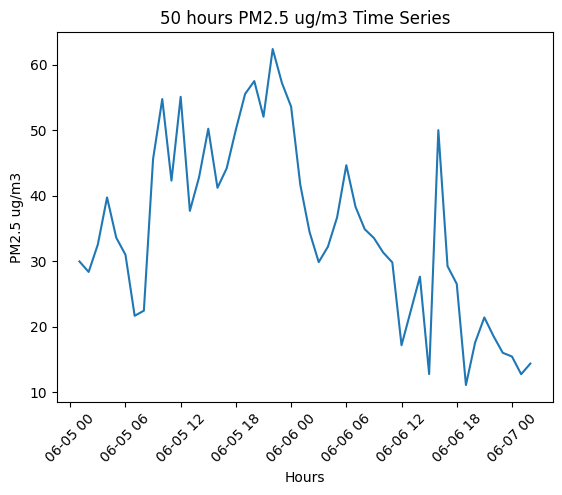

In [132]:
# Creating a time series plot using Matplotlib
hours = 50
plt.plot(df.index[0:hours], df[feature][0:hours])
plt.xlabel('Hours')
plt.ylabel(feature)
plt.title(str(hours) + ' hours '+ feature +' Time Series')
plt.xticks(rotation=45)
plt.show()

## Moving Average Plot

In [133]:
# Creating a rolling window of a specified size and 
# calculate the moving average of the feature values
hours = 300
window_size = 50  # set the window size to 30 hours
rolling_avg = df[feature][:hours].rolling(window = window_size,min_periods = 5).mean()
rolling_avg


timestamp
2019-06-05 01:00:00        NaN
2019-06-05 02:00:00        NaN
2019-06-05 03:00:00        NaN
2019-06-05 04:00:00        NaN
2019-06-05 05:00:00    32.8320
                        ...   
2019-06-17 08:00:00    34.9514
2019-06-17 09:00:00    34.9154
2019-06-17 10:00:00    35.0818
2019-06-17 11:00:00    35.2288
2019-06-17 12:00:00    35.4768
Name: PM2.5 ug/m3, Length: 300, dtype: float64

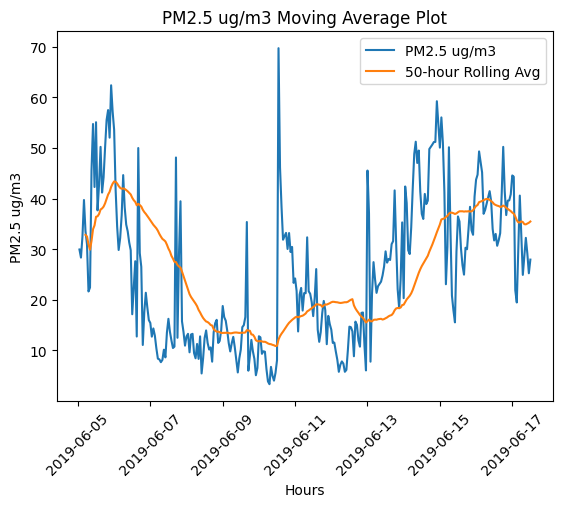

In [134]:
# Create a line plot of the original PM2.5 values and 
# the rolling average values
plt.plot(df.index[:hours], df[feature][:hours], label=feature)
plt.plot(rolling_avg.index, rolling_avg[:hours], label=f'{window_size}-hour Rolling Avg')
plt.xlabel('Hours')
plt.ylabel(feature)
plt.title(feature +' Moving Average Plot')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Linear Regression Plot

In [149]:
from sklearn.linear_model import LinearRegression



## Seasonal Subseries Plot